<a href="https://colab.research.google.com/github/DWEDAR12/AI-Project/blob/main/vgg16_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/finaldata_istg"


In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
img_path = test_data.filepaths[0]

img = tf.keras.preprocessing.image.load_img(
    img_path, target_size=(224, 224)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


In [ ]:
img_size = (224, 224)
batch_size = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    data_dir + "/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_data = val_test_gen.flow_from_directory(
    data_dir + "/val",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_data = val_test_gen.flow_from_directory(
    data_dir + "/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 880 images belonging to 10 classes.
Found 220 images belonging to 10 classes.
Found 200 images belonging to 9 classes.


In [ ]:
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 732s 26s/step - accuracy: 0.1391 - loss: 2.5933 - val_accuracy: 0.2682 - val_loss: 2.0426
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 699s 25s/step - accuracy: 0.2231 - loss: 2.0965 - val_accuracy: 0.2909 - val_loss: 1.8906
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 701s 25s/step - accuracy: 0.2969 - loss: 1.9283 - val_accuracy: 0.4182 - val_loss: 1.7534
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 694s 25s/step - accuracy: 0.3615 - loss: 1.7978 - val_accuracy: 0.3955 - val_loss: 1.6474
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 687s 25s/step - accuracy: 0.3960 - loss: 1.7081 - val_accuracy: 0.5136 - val_loss: 1.5073
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 686s 25s/step - accuracy: 0.4652 - loss: 1.5472 - val_accuracy: 0.4909 - val_loss: 1.4261
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 687s 25s/step - accuracy: 0.4855 - loss: 1.4490 - val_accuracy: 0.5182 - val_loss: 1.3706
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 690s 25s/step - accuracy: 0.5347 - loss: 1.4020 - val_accuracy: 0.

In [ ]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 808s 29s/step - accuracy: 0.7560 - loss: 0.8257 - val_accuracy: 0.6591 - val_loss: 0.9088
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 805s 29s/step - accuracy: 0.7630 - loss: 0.7387 - val_accuracy: 0.6591 - val_loss: 0.9111
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 805s 29s/step - accuracy: 0.7568 - loss: 0.7072 - val_accuracy: 0.6818 - val_loss: 0.8193
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 817s 29s/step - accuracy: 0.7862 - loss: 0.6628 - val_accuracy: 0.7409 - val_loss: 0.7969
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 809s 29s/step - accuracy: 0.8006 - loss: 0.6044 - val_accuracy: 0.7591 - val_loss: 0.7493
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 815s 29s/step - accuracy: 0.8321 - loss: 0.5362 - val_accuracy: 0.7409 - val_loss: 0.7374
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 808s 29s/step - accuracy: 0.8464 - loss: 0.5121 - val_accuracy: 0.7364 - val_loss: 0.7837
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 816s 29s/step - accuracy: 0.8062 - loss: 0.5733 - val_accuracy: 0.

In [ ]:
set(train_data.class_indices.keys()) - set(test_data.class_indices.keys())


{'Angelina Jolie'}

7/7 ━━━━━━━━━━━━━━━━━━━━ 133s 17s/step


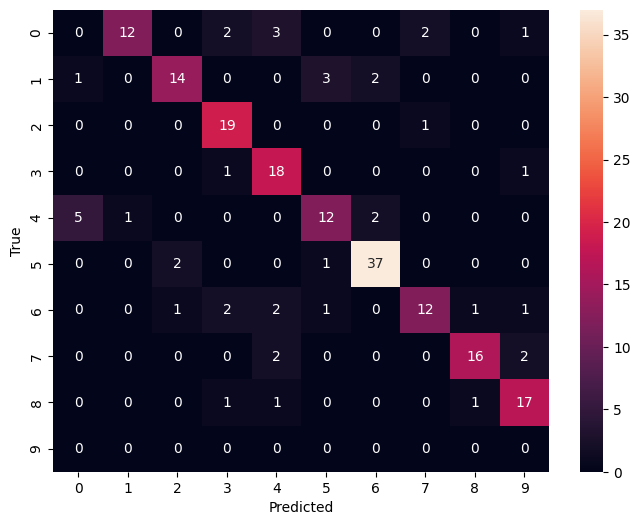

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.04      0.05      0.04        20
           4       0.00      0.00      0.00        20
           5       0.06      0.03      0.04        40
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.06      0.05      0.05        20
           9       0.00      0.00      0.00         0

    accuracy                           0.01       200
   macro avg       0.02      0.01      0.01       200
weighted avg       0.02      0.01      0.02       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_true, y_pred))


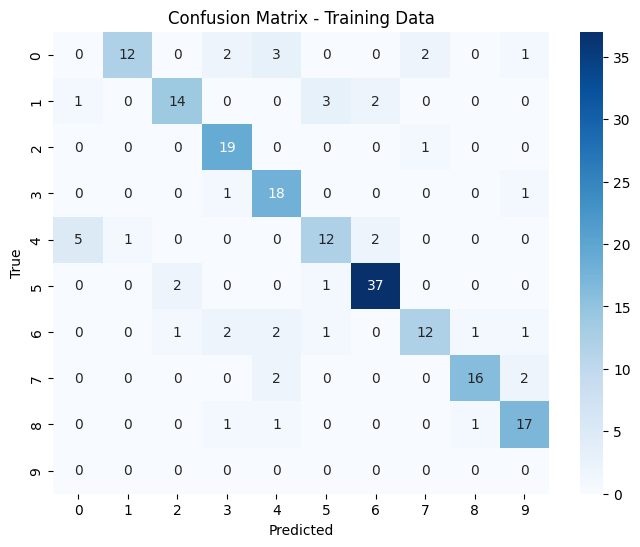

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Training Data")
plt.show()


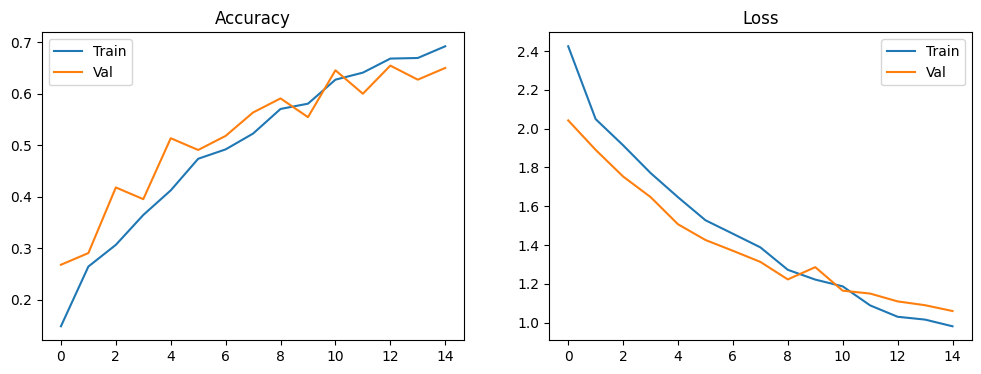

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.legend()

plt.show()

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
img_path = test_data.filepaths[0]

img = tf.keras.preprocessing.image.load_img(
    img_path, target_size=(224, 224)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


In [ ]:
heatmap = make_gradcam_heatmap(
    img_array, model, "block5_conv3"
)


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


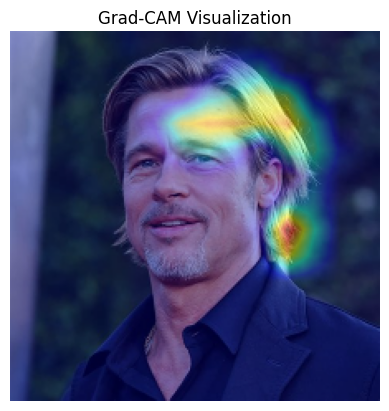

In [ ]:
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

heatmap = cv2.resize(heatmap, (224, 224))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM Visualization")
plt.axis("off")
plt.show()


In [ ]:
MODEL_SAVE_PATH = "/content/drive/MyDrive/finaldata_istg/vgg16_model.h5"

model.save(MODEL_SAVE_PATH)